# Iris Flower - Batch Prediction


In this notebook we will,

1. Load the batch inference data that arrived in the last 24 hours
2. Predict the first Iris Flower found in the batch
3. Write the ouput png of the Iris flower predicted, to be displayed in Github Pages.

In [1]:
!git clone https://github.com/naziherrahel/Software-Development-Technologies.git

Cloning into 'Software-Development-Technologies'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 102 (delta 3), reused 2 (delta 2), pack-reused 85 (from 1)
Receiving objects: 100% (102/102), 7.63 MiB | 12.65 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
%%capture
!pip install -U hopsworks --quiet


In [3]:
%%capture
!pip install confluent_kafka


In [4]:
import pandas as pd
import hopsworks
import joblib

project = hopsworks.login()
fs = project.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········

Multiple projects found. 

	 (1) naziherr
	 (2) lab01
	 (3) lab2

Enter number corresponding to the project to use: 2

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1193116


In [5]:
mr = project.get_model_registry()
model = mr.get_model("iris", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training.

So, let's download the iris dataset, and preview some rows.

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [37]:
feature_view = fs.get_feature_view(name="iris1", version=1)

Now we will do some **Batch Inference**.

We will read all the input features that have arrived in the last 24 hours, and score them.

In [50]:
import datetime
from PIL import Image

batch_data = feature_view.get_batch_data()

y_pred = model.predict(batch_data)

y_pred

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.41s) 


array(['Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Virginic

In [51]:
batch_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.700000,3.800000,1.700000,0.300000
1,5.600000,2.700000,4.200000,1.300000
2,6.300000,3.300000,6.000000,2.500000
3,6.000000,2.900000,4.500000,1.500000
4,5.000000,3.000000,1.600000,0.200000
...,...,...,...,...
147,6.400000,2.800000,5.600000,2.100000
148,5.000000,3.400000,1.600000,0.400000
149,5.955304,4.018996,1.604284,0.689386
150,6.696777,3.204624,5.362983,1.098906


Batch prediction output is the last entry in the batch - it is output as a file 'latest_iris.png'

In [52]:
flower = y_pred[y_pred.size-1]
flower_img = "/content/Software-Development-Technologies/Labs/module02/src/01-module/assets/" + flower + ".png"
img = Image.open(flower_img)

img.save("/content/Software-Development-Technologies/Labs/module02/src/01-module/assets/latest_iris.png")

In [53]:
iris_fg = fs.get_feature_group(name="iris1", version=1)
df = iris_fg.read()
df

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.34s) 


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.700000,3.800000,1.700000,0.300000,Setosa
1,5.600000,2.700000,4.200000,1.300000,Versicolor
2,6.300000,3.300000,6.000000,2.500000,Virginica
3,6.000000,2.900000,4.500000,1.500000,Versicolor
4,5.000000,3.000000,1.600000,0.200000,Setosa
...,...,...,...,...,...
147,6.400000,2.800000,5.600000,2.100000,Virginica
148,5.000000,3.400000,1.600000,0.400000,Setosa
149,5.955304,4.018996,1.604284,0.689386,Setosa
150,6.696777,3.204624,5.362983,1.098906,Versicolor


In [54]:
label = df.iloc[-1]["variety"]
label

'Versicolor'

In [55]:
label_flower = "/content/Software-Development-Technologies/Labs/module02/src/01-module/assets/" + label + ".png"

img = Image.open(label_flower)

img.save("/content/Software-Development-Technologies/Labs/module02/src/01-module/assets/actual_iris.png")

In [56]:
import pandas as pd

monitor_fg = fs.get_or_create_feature_group(name="iris_predictions",
                                  version=1,
                                  primary_key=["datetime"],
                                  description="Iris flower Prediction/Outcome Monitoring"
                                 )

In [57]:
from datetime import datetime
now = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")

data = {
    'prediction': [flower],
    'label': [label],
    'datetime': [now],
}
monitor_df = pd.DataFrame(data)
monitor_fg.insert(monitor_df)

Uploading Dataframe: 100.00% |██████████| Rows 1/1 | Elapsed Time: 00:00 | Remaining Time: 00:00
Use fg.materialization_job.run(args=-op offline_fg_materialization -path hdfs:///Projects/lab01/Resources/jobs/iris_predictions_1_offline_fg_materialization/config_1740210370571) to trigger the materialization job again.


(Job('iris_predictions_1_offline_fg_materialization', 'SPARK'), None)

In [58]:
history_df = monitor_fg.read()
history_df

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.45s) 


,prediction,label,datetime
0,Setosa,Setosa,"02/22/2025, 07:48:53"
1,Setosa,Virginica,"02/22/2025, 08:01:36"
2,Setosa,Setosa,"02/23/2025, 15:35:32"
3,Setosa,Setosa,"02/23/2025, 15:43:19"
4,Versicolor,Versicolor,"02/23/2025, 15:45:36"


In [59]:
%%capture
!pip install dataframe-image

In [60]:
import dataframe_image as dfi

df_recent = history_df.tail(5)

dfi.export(df_recent, '/content/Software-Development-Technologies/Labs/module02/src/01-module/assets/df_recent.png', table_conversion = 'matplotlib')

In [61]:
from sklearn.metrics import confusion_matrix

predictions = history_df[['prediction']]
labels = history_df[['label']]

results = confusion_matrix(labels, predictions)
print(results)

[[3 0 0]
 [0 1 0]
 [1 0 0]]


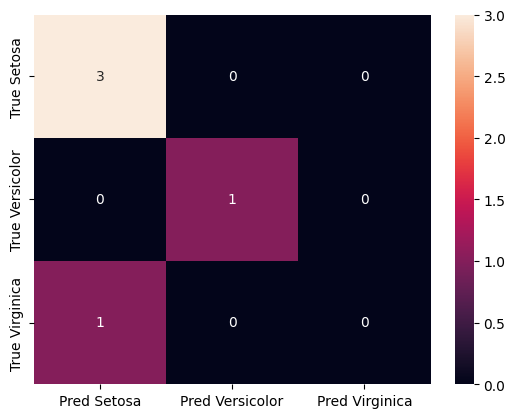

In [63]:
from matplotlib import pyplot
import seaborn as sns

# Only create the confusion matrix when our iris_predictions feature group has examples of all 3 iris flowers
if results.shape == (3,3):

    df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                         ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

    cm = sns.heatmap(df_cm, annot=True)

    fig = cm.get_figure()
    fig.savefig("/content/Software-Development-Technologies/Labs/module02/src/01-module/assets/confusion_matrix.png")
    df_cm
else:
    print("Run the batch inference pipeline more times until you get 3 different iris flowers")